# 004: Implement logistic regression

needs data loading, train/test split, training, evaluation

In [2]:
import sys

import matplotlib.pyplot as plt 
import numpy as np

sys.path.append("../")
from models import LogisticRegression
from visualizations import plot_roc, plot_losses
from preprocessing import normalize_and_bias_data

%load_ext autoreload
%autoreload 2

In [8]:
train = np.load("../data/dataset_prep/train.npz")
x_train = train["x_train"]
y_train = train["y_train"]

In [6]:
x = normalize_and_bias_data(x_train)
no_std = np.std(x, axis=0) < 1e-8
x[:, no_std] = np.random.normal(0, 1, size=(x.shape[0], np.sum(no_std)))

In [7]:
corr = np.corrcoef(x[:100000,1:], rowvar=False)
abs_corr = np.abs(corr)

# Use only lower-triangular entries (excluding diagonal)
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)
abs_corr_lower = np.where(mask, abs_corr, 0)

# Get indices of top correlations (from the lower triangle)
n_top = 200
flat_indices = np.argsort(abs_corr_lower.ravel())[-n_top:]
top_indices = np.column_stack(np.unravel_index(flat_indices, corr.shape))

# Sort by the first index i
top_indices = top_indices[np.argsort(top_indices[:, 0])]

# Display results
for i, j in top_indices:
    if corr[i, j] > 0.9:
        print(f"Features ({i}, {j}): corr = {corr[i, j]:.4f}")

Features (21, 184): corr = 0.9456
Features (191, 575): corr = 0.9942
Features (216, 217): corr = 0.9023
Features (235, 239): corr = 0.9180
Features (236, 240): corr = 0.9314
Features (245, 246): corr = 0.9170
Features (246, 249): corr = 0.9241
Features (489, 504): corr = 1.0000
Features (489, 503): corr = 1.0000
Features (503, 504): corr = 1.0000
Features (548, 556): corr = 0.9699
Features (549, 564): corr = 0.9632
Features (549, 557): corr = 0.9846
Features (550, 558): corr = 0.9506
Features (551, 566): corr = 0.9447
Features (551, 559): corr = 0.9631
Features (553, 561): corr = 0.9871
Features (557, 564): corr = 0.9782
Features (558, 565): corr = 0.9111
Features (559, 566): corr = 0.9809
Features (562, 569): corr = 0.9487


In [43]:
model = LogisticRegression(gamma=1e-2)
max_samples = 100000
train_losses, val_losses = model.hyperparameter_tuning(x_train[:max_samples], y_train[:max_samples], verbose=True)
#model.train(X=x_train[:max_samples], y=y_train[:max_samples])

Evaluating lambda=0.001
Condition number of X^T X: 9.30e+08
Iter    0: loss=0.6931
Iter   10: loss=0.6726
Iter   20: loss=0.6674
Iter   30: loss=0.6669
Iter   40: loss=0.6676
Early stopping at iteration 50
train loss=0.6692188079118795
val loss=0.6668956778251696


KeyboardInterrupt: 

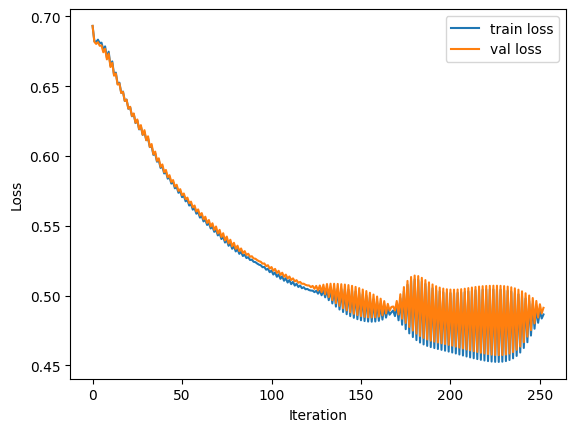

In [42]:
plot_losses(train_losses, val_losses)

In [4]:
model._lambda

0.0

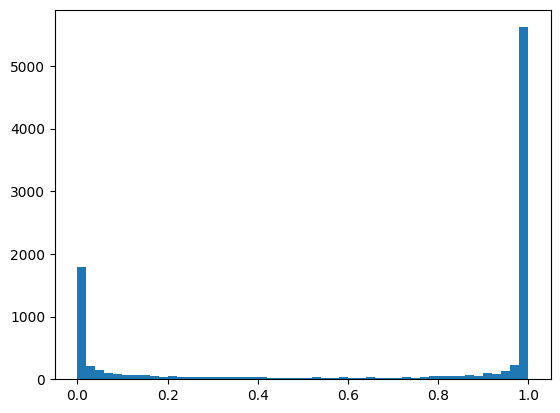

In [5]:
plt.hist(model.predict(x_train[:max_samples], scores=True), bins=50)
plt.show()

Threshold: 0.00, F1 Score: 0.1641
Threshold: 0.01, F1 Score: 0.1656
Threshold: 0.02, F1 Score: 0.1703
Threshold: 0.03, F1 Score: 0.1765
Threshold: 0.04, F1 Score: 0.1837
Threshold: 0.05, F1 Score: 0.1906
Threshold: 0.06, F1 Score: 0.1973
Threshold: 0.07, F1 Score: 0.2037
Threshold: 0.08, F1 Score: 0.2094
Threshold: 0.09, F1 Score: 0.2148
Threshold: 0.10, F1 Score: 0.2204
Threshold: 0.11, F1 Score: 0.2257
Threshold: 0.12, F1 Score: 0.2307
Threshold: 0.13, F1 Score: 0.2352
Threshold: 0.14, F1 Score: 0.2402
Threshold: 0.15, F1 Score: 0.2444
Threshold: 0.16, F1 Score: 0.2489
Threshold: 0.17, F1 Score: 0.2533
Threshold: 0.18, F1 Score: 0.2573
Threshold: 0.19, F1 Score: 0.2615
Threshold: 0.20, F1 Score: 0.2660
Threshold: 0.21, F1 Score: 0.2700
Threshold: 0.22, F1 Score: 0.2746
Threshold: 0.23, F1 Score: 0.2789
Threshold: 0.24, F1 Score: 0.2837
Threshold: 0.25, F1 Score: 0.2874
Threshold: 0.26, F1 Score: 0.2913
Threshold: 0.27, F1 Score: 0.2955
Threshold: 0.28, F1 Score: 0.2995
Threshold: 0.2

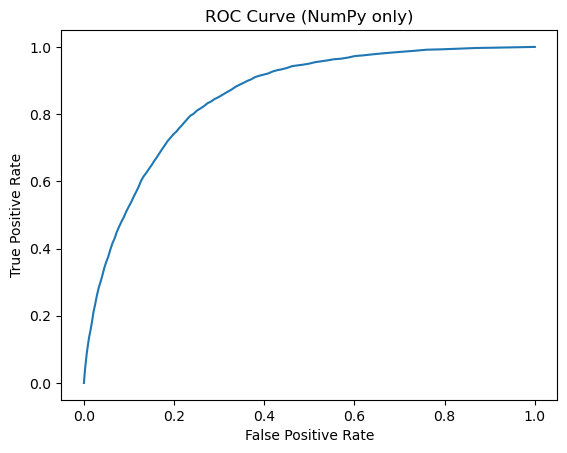

In [42]:
y_score = model.predict(x_train[max_samples:max_samples * 2], scores=True)
y_true = y_train[max_samples:max_samples * 2].astype(int)
plot_roc(y_score, y_true)

# make predictions on test set

In [ ]:
test = np.load("../data/dataset_prep/test.npz")
x_test = test["x_test"]
test_ids = test["test_ids"]


In [133]:
x_test.shape

(109379, 316)